# Loan Repayment Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#!CHDIR

In [4]:
df = pd.read_csv('TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.shape

(396030, 27)

In [8]:
#emp_tile, emp_length, title, revol_util, mort_acc columns have some data missing

# EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

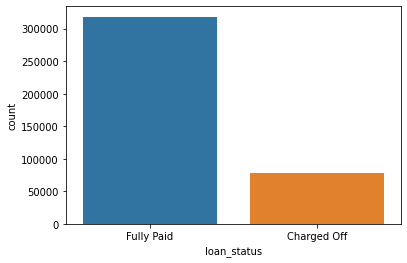

In [10]:
sns.countplot(x='loan_status',data=df)

#'class imbalance check'

<AxesSubplot:>

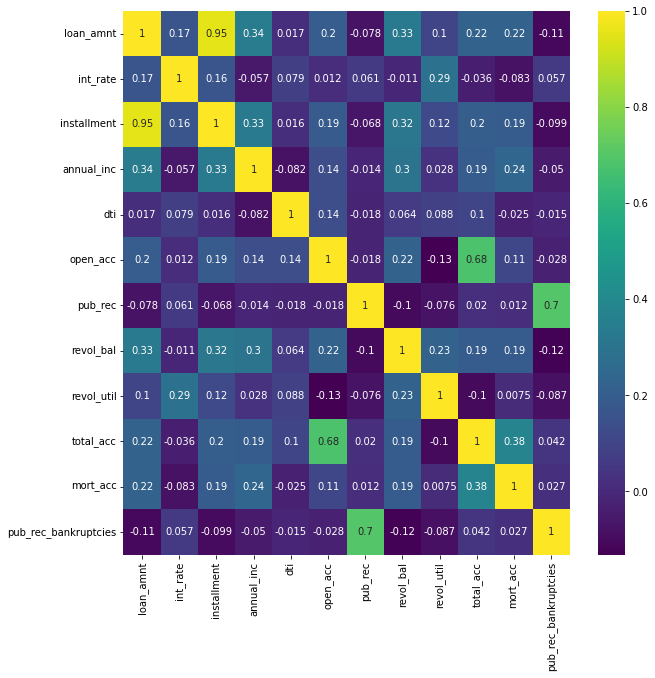

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

- we observed that installment amount and loan_amount are highly correlated.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

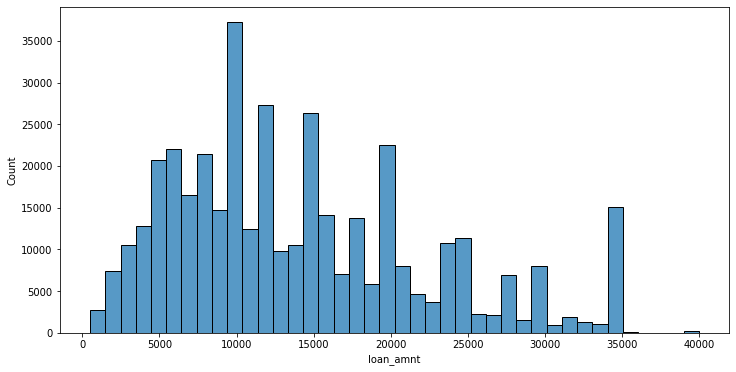

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(x='loan_amnt',data=df,bins=40)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

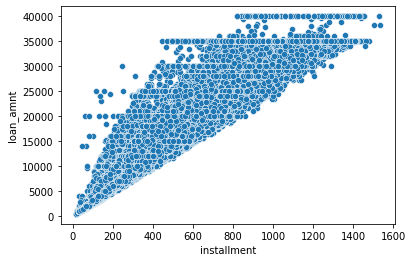

In [11]:
sns.scatterplot(y='loan_amnt',x='installment',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

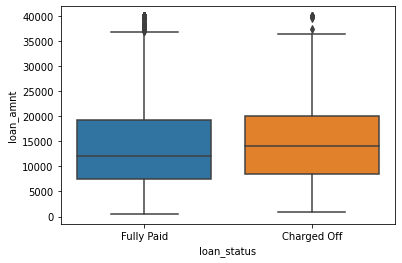

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
df['grade'].unique()

# grades are classification of CIBIL score.

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [15]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

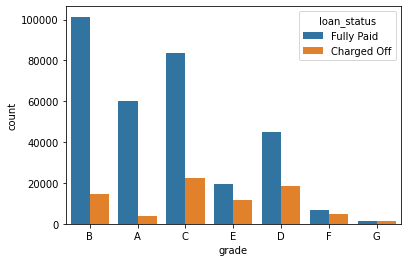

In [16]:
sns.countplot(data=df,x='grade',hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

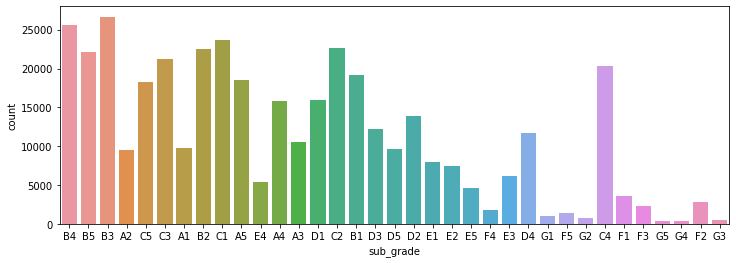

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade')

In [18]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

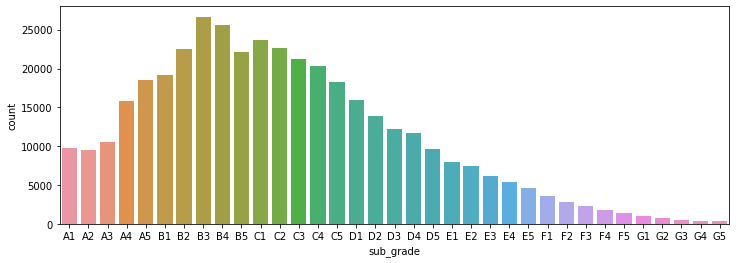

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade',order=df['sub_grade'].sort_values().unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

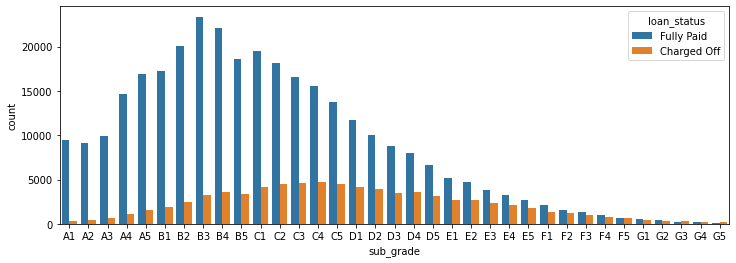

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade',
              order=df['sub_grade'].sort_values().unique(),
             hue='loan_status')

# missing data

In [22]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [23]:
df.shape

(396030, 27)

In [24]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [25]:
df['emp_title'].nunique()

173105

In [26]:
#too many titles so cannot create dummies. let's drop this column.

df = df.drop('emp_title',axis=1)

In [27]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [28]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [29]:
emp_length_order = ['< 1 year','1 year','2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

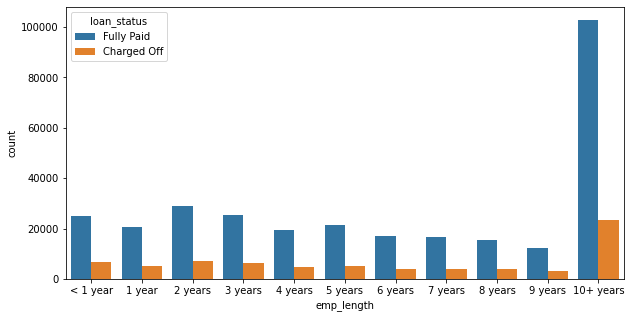

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df,hue='loan_status',
             order=emp_length_order)

In [31]:
# since the ratio of FP and CO is not showing significant difference so let's drop it

In [32]:
df = df.drop('emp_length',axis=1)

In [33]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [34]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [35]:
# title column is simply a string description of the purpose column.

In [36]:
df = df.drop('title',axis=1)

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [38]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [39]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [40]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [41]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [42]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [43]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [44]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Creating dummy variables

In [48]:
df.select_dtypes(['object']).columns

# to see non-numeric columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [49]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [50]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [51]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [52]:
df = df.drop('grade',axis=1)

#since grade is part of sub_grade

In [53]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [54]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [55]:
df = df.drop('loan_status',axis=1)

In [56]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [57]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [58]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [59]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [60]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [61]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [62]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [63]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [65]:
df['home_ownership'] = df['home_ownership'].replace(to_replace=['OTHER','NONE','ANY'],value='Other')

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
Other          142
Name: home_ownership, dtype: int64

In [67]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [68]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [69]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [70]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [71]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [72]:
df = df.drop('address',axis=1)

In [73]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [74]:
#we wouldn't know in advance whether or not a loan would be issued when using our model

df = df.drop('issue_d',axis=1)

In [75]:
df['earliest_cr_line'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object>

In [76]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [77]:
df['earliest_cr_line'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64>

# Model Training

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop('loan_repaid',axis=1)
y = df['loan_repaid']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:

# Logistic Regression 


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression(max_iter=200)

In [84]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [85]:
predictions = logmodel.predict(X_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.06      0.10     23363
           1       0.81      0.99      0.89     95203

    accuracy                           0.80    118566
   macro avg       0.67      0.52      0.49    118566
weighted avg       0.75      0.80      0.73    118566



In [88]:
print(confusion_matrix(y_test,predictions))

[[ 1286 22077]
 [ 1148 94055]]


In [89]:

# KNN


In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knnmodel = KNeighborsClassifier(n_neighbors=15)

In [92]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [93]:
pred = knnmodel.predict(X_test)

In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.31      0.02      0.04     23363
           1       0.80      0.99      0.89     95203

    accuracy                           0.80    118566
   macro avg       0.56      0.51      0.46    118566
weighted avg       0.71      0.80      0.72    118566



In [95]:
df.shape

(395219, 79)

In [96]:
import tqdm
error_rate = []

# Will take some time
for i in tqdm.tqdm(range(1,16,2)):
    
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    pred_i = knnmodel.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [16:10<00:00, 121.33s/it]


Text(0, 0.5, 'Error Rate')

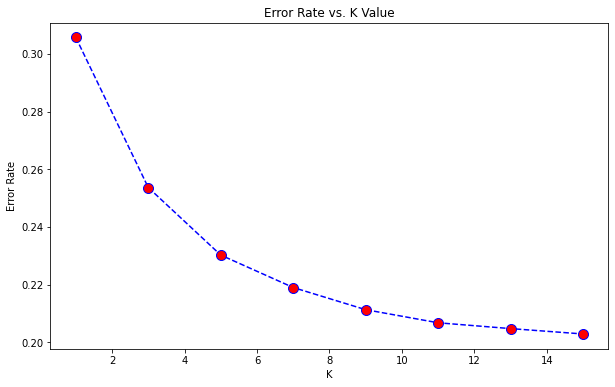

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:

#decision tree and random forest


In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
pred_dt = dtree.predict(X_test)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.06      0.10     23363
           1       0.81      0.99      0.89     95203

    accuracy                           0.80    118566
   macro avg       0.67      0.52      0.49    118566
weighted avg       0.75      0.80      0.73    118566



In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier(n_estimators=200)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [112]:
rfc_pred = rfc.predict(X_test)

In [113]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



In [114]:

# SVM 


In [120]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

In [121]:
new_df = df.groupby('loan_repaid',as_index=False).apply(lambda x: x.sample(n=5000))

In [122]:
new_df['loan_repaid'].value_counts()

0    5000
1    5000
Name: loan_repaid, dtype: int64

In [126]:
new_df.reset_index(drop=True)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,7500.0,36,16.55,265.72,104572.0,18.42,2006,21.0,0.0,7333.0,...,0,0,0,0,0,1,0,0,0,0
1,29900.0,60,21.48,816.99,65000.0,32.13,2002,11.0,0.0,7518.0,...,1,0,0,0,0,0,0,0,1,0
2,9000.0,36,11.99,298.89,65000.0,27.77,2000,14.0,0.0,2594.0,...,0,0,0,0,0,0,0,1,0,0
3,16000.0,36,17.77,576.60,65000.0,19.80,1999,12.0,0.0,17611.0,...,0,0,0,0,0,0,0,0,0,1
4,10000.0,36,14.49,344.17,40000.0,15.81,2005,6.0,1.0,1254.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10000.0,36,12.12,332.72,147000.0,4.30,1994,20.0,0.0,6601.0,...,1,0,0,0,0,0,1,0,0,0
9996,11100.0,36,17.10,396.30,33000.0,30.40,2009,10.0,0.0,14941.0,...,1,1,0,0,0,0,0,0,0,0
9997,3000.0,36,13.11,101.25,55000.0,1.35,2002,2.0,0.0,2708.0,...,1,1,0,0,0,0,0,0,0,0
9998,28000.0,36,9.99,903.35,101000.0,16.74,1998,13.0,0.0,33897.0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
X = new_df.drop('loan_repaid',axis=1)
y = new_df['loan_repaid']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [131]:
from sklearn.svm import SVC

In [132]:
svmmodel = SVC()

In [133]:
svmmodel.fit(X_train,y_train)

SVC()

In [134]:
predictions = svmmodel.predict(X_test)

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1504
           1       0.58      0.51      0.54      1496

    accuracy                           0.57      3000
   macro avg       0.58      0.57      0.57      3000
weighted avg       0.58      0.57      0.57      3000



In [ ]:
#how to handle class imbalance

#smote up-sampling or down-sampling